### Project on Sentiment Analysis of Real-time Flipkart Product Reviews

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("data.csv")    #### loading dataset

In [3]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
df.shape

(8518, 8)

In [5]:
df.info()     ##information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [6]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [7]:
df.columns=[col.lower().replace(" ","_") for col in df.columns]    ####### renaming cloumns

In [8]:
df.columns

Index(['reviewer_name', 'review_title', 'place_of_review', 'up_votes',
       'down_votes', 'month', 'review_text', 'ratings'],
      dtype='object')

In [9]:
df_1 = df[['review_title','review_text','ratings']]  # taking imp columns for model development

In [10]:
df_1.isnull().sum()

review_title    10
review_text      8
ratings          0
dtype: int64

In [11]:
df_1.dropna(inplace=True)

C:\Users\JAY KUMAR\AppData\Local\Temp\ipykernel_13860\871821986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(inplace=True)


In [12]:
df_1.isnull().sum()

review_title    0
review_text     0
ratings         0
dtype: int64

In [13]:
df_1.shape

(8508, 3)

In [14]:
df_1['review'] = df_1['review_title'] + ' ' + df_1['review_text']


C:\Users\JAY KUMAR\AppData\Local\Temp\ipykernel_13860\3491734512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['review'] = df_1['review_title'] + ' ' + df_1['review_text']


In [15]:
df_1

,review_title,review_text,ratings,review
0,Nice product,"Nice product, good quality, but price is now r...",4,"Nice product Nice product, good quality, but p..."
1,Don't waste your money,They didn't supplied Yonex Mavis 350. Outside ...,1,Don't waste your money They didn't supplied Yo...
2,Did not meet expectations,Worst product. Damaged shuttlecocks packed in ...,1,Did not meet expectations Worst product. Damag...
3,Fair,"Quite O. K. , but nowadays the quality of the...",3,"Fair Quite O. K. , but nowadays the quality o..."
4,Over priced,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Over priced Over pricedJust â?¹620 ..from reta...
...,...,...,...,...
8503,Yones Mavis 350 Blue cap,Wrost and duplicate productDon't buy this sell...,1,Yones Mavis 350 Blue cap Wrost and duplicate p...
8504,For Mavis350,Received product intact and sealedREAD MORE,5,For Mavis350 Received product intact and seale...
8505,Very Good,Delivered before time but price is high from m...,3,Very Good Delivered before time but price is h...
8506,Don't waste your money,up to the mark but same is available in market...,4,Don't waste your money up to the mark but same...


In [16]:
df_1["ratings"].value_counts()

5    5078
4    1744
1     765
3     615
2     306
Name: ratings, dtype: int64

In [17]:

df_1['rating_cat'] = df_1['ratings'].apply(lambda x: 'Negative' if x in [1, 2] else ('Neutral' if x == 3 else 'Positive' if x in [4, 5] else None))

C:\Users\JAY KUMAR\AppData\Local\Temp\ipykernel_13860\2834828803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['rating_cat'] = df_1['ratings'].apply(lambda x: 'Negative' if x in [1, 2] else ('Neutral' if x == 3 else 'Positive' if x in [4, 5] else None))


In [18]:
df_1

,review_title,review_text,ratings,review,rating_cat
0,Nice product,"Nice product, good quality, but price is now r...",4,"Nice product Nice product, good quality, but p...",Positive
1,Don't waste your money,They didn't supplied Yonex Mavis 350. Outside ...,1,Don't waste your money They didn't supplied Yo...,Negative
2,Did not meet expectations,Worst product. Damaged shuttlecocks packed in ...,1,Did not meet expectations Worst product. Damag...,Negative
3,Fair,"Quite O. K. , but nowadays the quality of the...",3,"Fair Quite O. K. , but nowadays the quality o...",Neutral
4,Over priced,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Over priced Over pricedJust â?¹620 ..from reta...,Negative
...,...,...,...,...,...
8503,Yones Mavis 350 Blue cap,Wrost and duplicate productDon't buy this sell...,1,Yones Mavis 350 Blue cap Wrost and duplicate p...,Negative
8504,For Mavis350,Received product intact and sealedREAD MORE,5,For Mavis350 Received product intact and seale...,Positive
8505,Very Good,Delivered before time but price is high from m...,3,Very Good Delivered before time but price is h...,Neutral
8506,Don't waste your money,up to the mark but same is available in market...,4,Don't waste your money up to the mark but same...,Positive


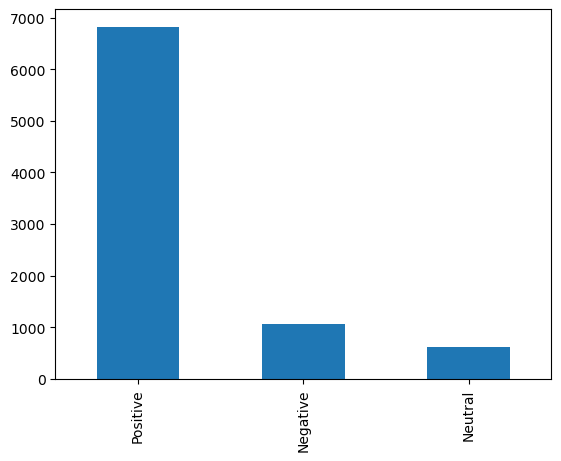

In [19]:
df_1['rating_cat'].value_counts().plot(kind='bar')
plt.show()

In [87]:
pip install wordcloud


     -------------------------------------- 300.0/300.0 kB 1.7 MB/s eta 0:00:00


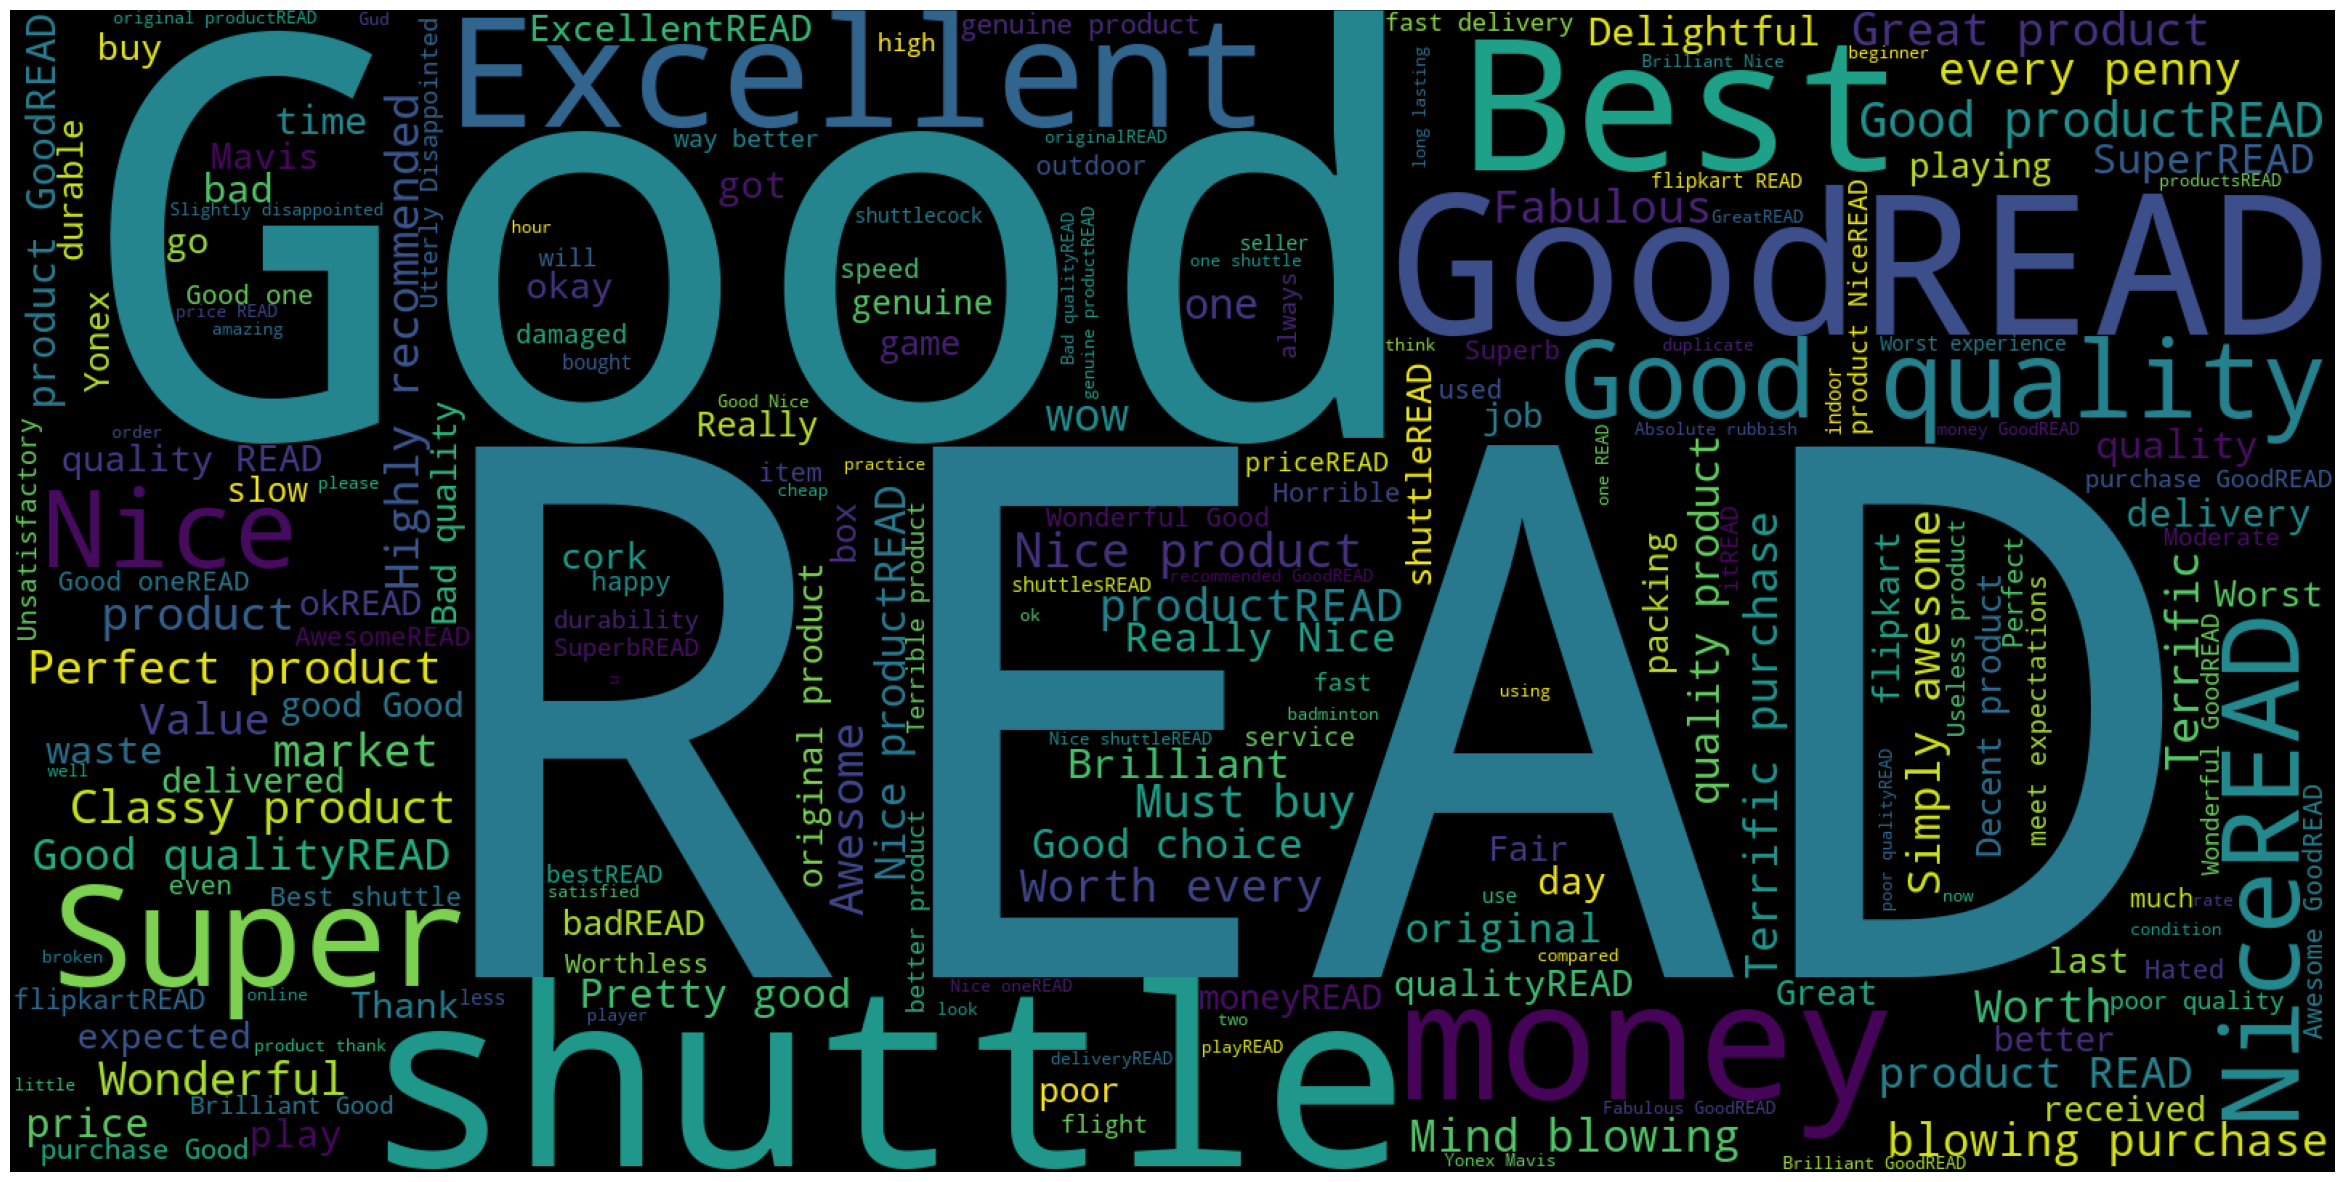

In [88]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df_1['review']))
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 1. Identify the input and output variables

In [20]:
df_1.columns

Index(['review_title', 'review_text', 'ratings', 'review', 'rating_cat'], dtype='object')

In [21]:
X=df_1[["review"]]
y=df_1.rating_cat

### 2. Split the data into train and test

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6381, 1) (6381,)
(2127, 1) (2127,)


### Step 3 - Data Preprocessing on train data (X_train)

In [23]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [24]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\JAY
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\JAY
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\JAY
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
stemmer = PorterStemmer()             # object creation for stemming and lemmatizer

lemmatizer = WordNetLemmatizer()

In [26]:
X_train

,review
3686,Did not meet expectations Original product.......
6925,Highly recommended Prompt delivery and good pa...
1134,Great product NiceREAD MORE
8466,Best delivery system The product is not origin...
7413,Worth the money Wrost itemREAD MORE
...,...
4636,Waste of money! NiceREAD MORE
6196,Excellent niceREAD MORE
441,Terrific purchase GoodREAD MORE
1645,Simply awesome Nice product u can go for it.. ...


In [27]:
## function for cleaning the text data to reduce noise

def preprocess(raw_text, flag):
    
    raw_text = str(raw_text) # Convert input to string (if it's not already)

    sentence = re.sub("[^a-zA-Z]", " ", raw_text) # Removing special characters and digits
    
    sentence = sentence.lower()

    tokens = sentence.split()

    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if flag == 'stem':
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [28]:
from tqdm import tqdm, tqdm_notebook       ## for progress bar

tqdm.pandas()

In [29]:
temp_df = X_train['review'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 6381/6381 [00:34<00:00, 184.76it/s]


,0,1
3686,meet expectation original product thanks sendi...,9
6925,highly recommended prompt delivery good packag...,18
1134,great product niceread,3
8466,best delivery system product original read,6
7413,worth money wrost itemread,4


In [30]:
temp_df.columns = ['clean_text_lemma', 'Text_length_lemma']
temp_df

,clean_text_lemma,Text_length_lemma
3686,meet expectation original product thanks sendi...,9
6925,highly recommended prompt delivery good packag...,18
1134,great product niceread,3
8466,best delivery system product original read,6
7413,worth money wrost itemread,4
...,...,...
4636,waste money niceread,3
6196,excellent niceread,2
441,terrific purchase goodread,3
1645,simply awesome nice product u go packing good ...,14


In [31]:
X_train_clean = pd.concat([X_train, temp_df], axis=1)
X_train_clean

,review,clean_text_lemma,Text_length_lemma
3686,Did not meet expectations Original product.......,meet expectation original product thanks sendi...,9
6925,Highly recommended Prompt delivery and good pa...,highly recommended prompt delivery good packag...,18
1134,Great product NiceREAD MORE,great product niceread,3
8466,Best delivery system The product is not origin...,best delivery system product original read,6
7413,Worth the money Wrost itemREAD MORE,worth money wrost itemread,4
...,...,...,...
4636,Waste of money! NiceREAD MORE,waste money niceread,3
6196,Excellent niceREAD MORE,excellent niceread,2
441,Terrific purchase GoodREAD MORE,terrific purchase goodread,3
1645,Simply awesome Nice product u can go for it.. ...,simply awesome nice product u go packing good ...,14


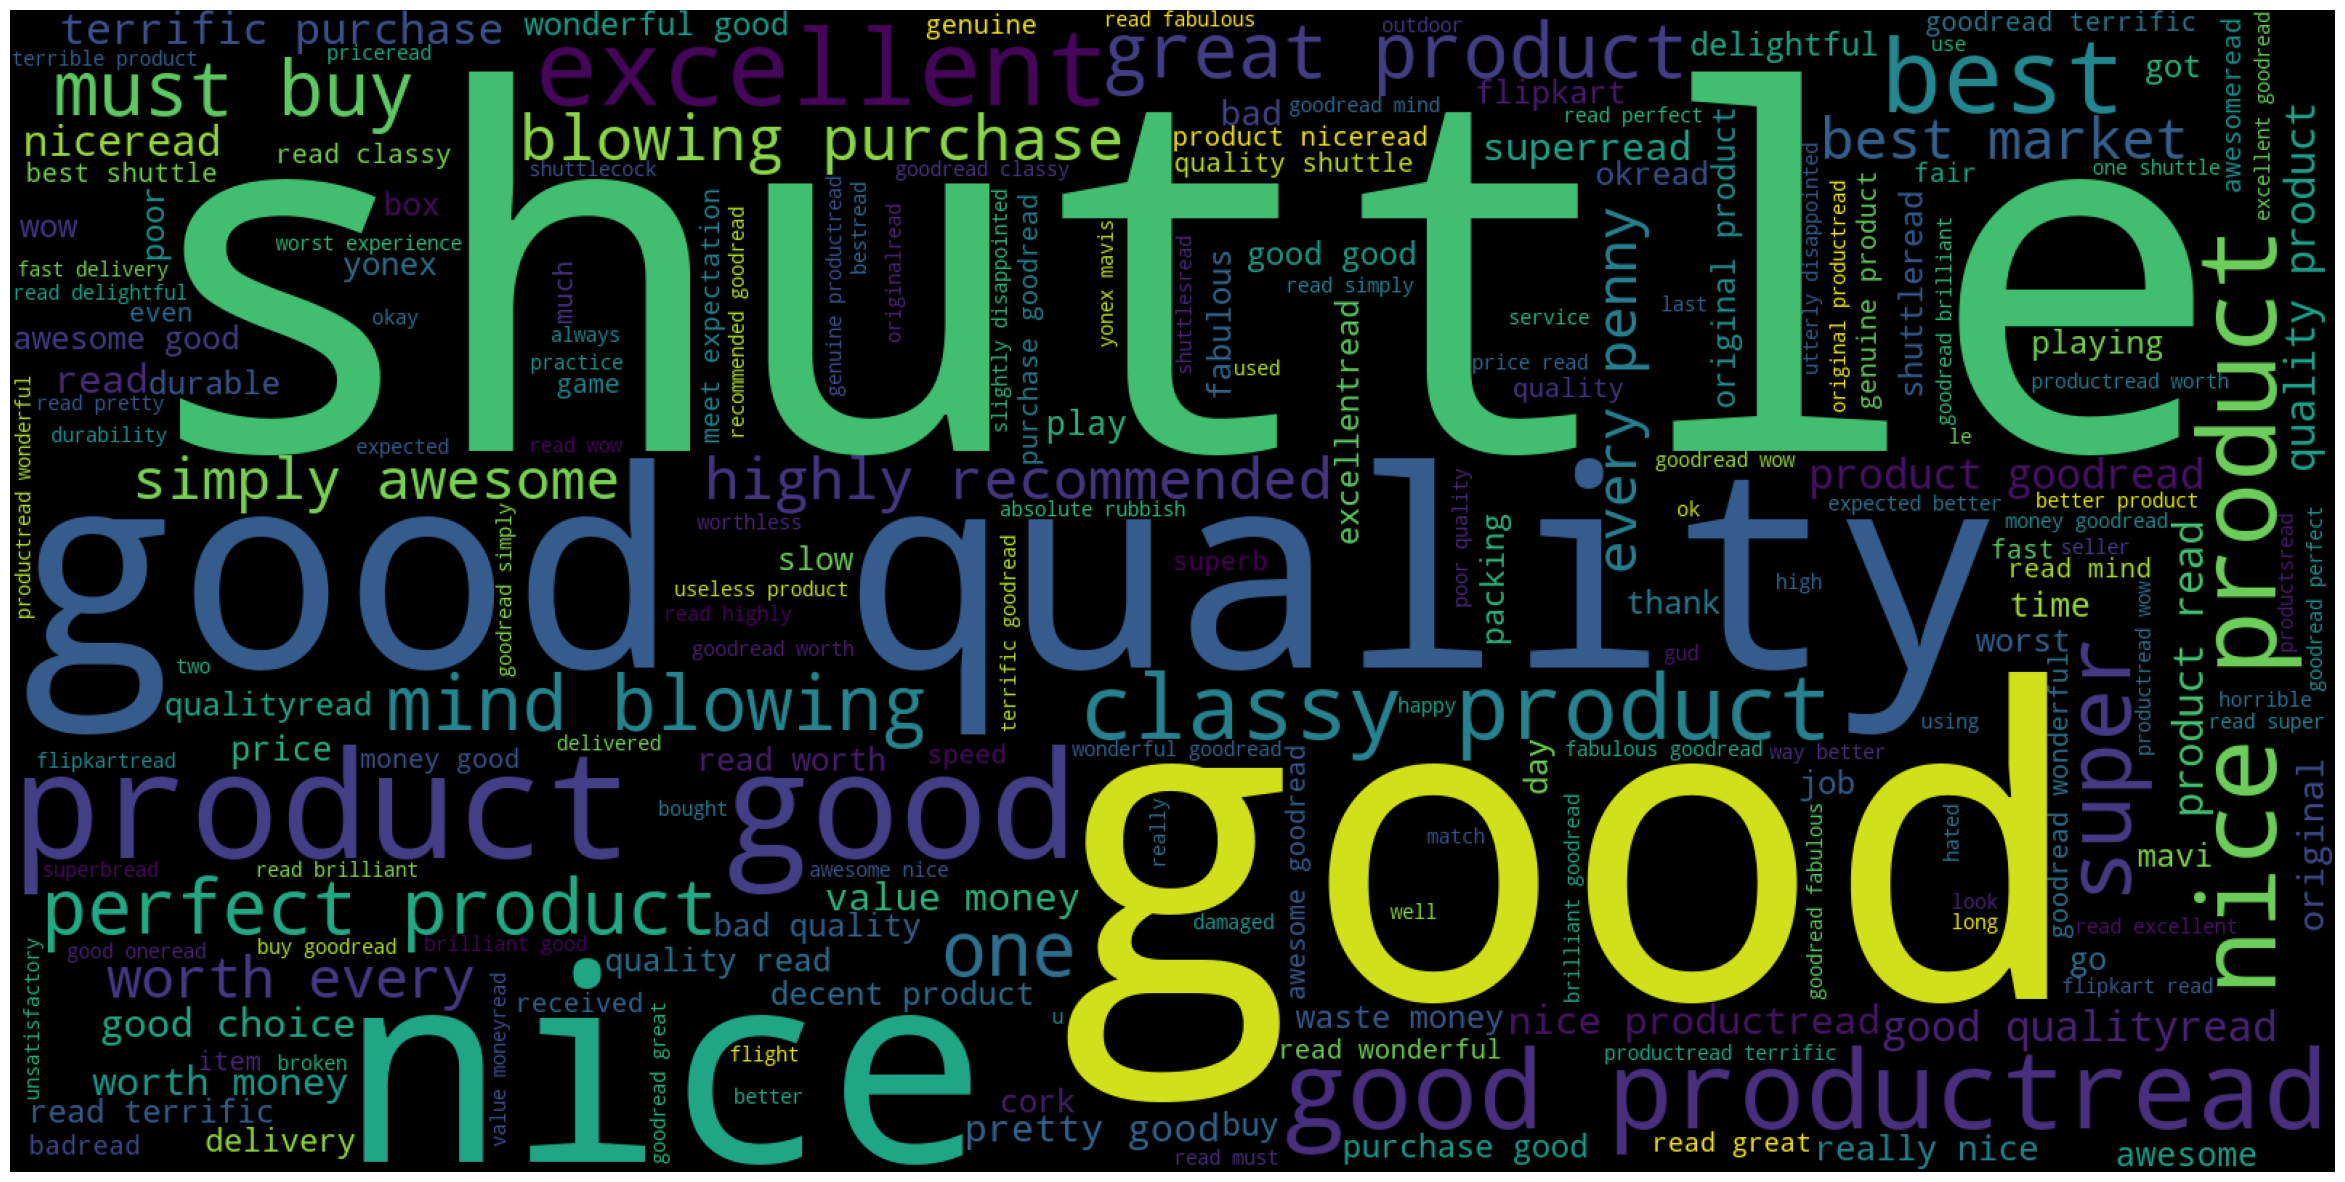

In [89]:
# Visuallizing an overall Word Cloud from the given cleaned data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(X_train_clean["clean_text_lemma"]))
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Step 4 - Data Preprocessing on test data (X_test)

In [32]:
temp_df = X_test['review'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 2127/2127 [00:11<00:00, 188.22it/s]


,0,1
1430,highly recommended niceread,3
6959,fabulous originalread,2
1216,absolute rubbish bad product bottom side quali...,13
554,classy product daughter happy n dilivary boy b...,9
1819,excellent durable one shuttle last week since ...,12


In [33]:
temp_df.columns = ['clean_text_lemma', 'Text_length_lemma']
temp_df

,clean_text_lemma,Text_length_lemma
1430,highly recommended niceread,3
6959,fabulous originalread,2
1216,absolute rubbish bad product bottom side quali...,13
554,classy product daughter happy n dilivary boy b...,9
1819,excellent durable one shuttle last week since ...,12
...,...,...
801,simply awesome goodread,3
6169,classy product good qualityread,4
5252,unsatisfactory awesome nice productread,4
870,simply awesome excellent shuttle go guyzread,6


In [34]:
X_test_clean = pd.concat([X_test, temp_df], axis=1)
X_test_clean

,review,clean_text_lemma,Text_length_lemma
1430,Highly recommended NiceREAD MORE,highly recommended niceread,3
6959,Fabulous! its originalREAD MORE,fabulous originalread,2
1216,"Absolute rubbish! Bad product, bottom side qua...",absolute rubbish bad product bottom side quali...,13
554,Classy product My daughter is happy n dilivary...,classy product daughter happy n dilivary boy b...,9
1819,Excellent It's Durable. One Shuttle lasts for ...,excellent durable one shuttle last week since ...,12
...,...,...,...
801,Simply awesome GoodREAD MORE,simply awesome goodread,3
6169,Classy product Good qualityREAD MORE,classy product good qualityread,4
5252,"Unsatisfactory awesome, Nice productREAD MORE",unsatisfactory awesome nice productread,4
870,Simply awesome Excellent shuttle go for it guy...,simply awesome excellent shuttle go guyzread,6


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

%time X_train_dtm = vect.fit_transform(X_train_clean["clean_text_lemma"])

print(X_train_dtm.shape)

CPU times: total: 62.5 ms
Wall time: 105 ms
(6381, 2590)


In [36]:
X_train_dtm

<6381x2590 sparse matrix of type '<class 'numpy.int64'>'
	with 32778 stored elements in Compressed Sparse Row format>

In [39]:
X_test_dtm = vect.transform(X_test_clean["clean_text_lemma"])

print(X_test_dtm.shape)

(2127, 2590)


### Step 5 - Building a Model (i.e. Train the classifier)

In [41]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_dtm, y_train)

C:\Users\JAY KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Step 6 - Evaluating on Train Data

In [51]:
y_train_pred = classifier.predict(X_train_dtm)

In [52]:
from sklearn import metrics

metrics.accuracy_score(y_train, y_train_pred)

0.9037768374862875

### Step 7 - Evaluate on Test Data

In [42]:
y_test_pred = classifier.predict(X_test_dtm)

In [43]:
y_test_pred

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [46]:
np.unique(y_test_pred)

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [50]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.8598965679360602

### Creating an Optimal Workflow
Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

In [59]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
     

import joblib
from joblib import Memory

import os
     

import warnings

warnings.filterwarnings('ignore')
     

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean['clean_text_lemma'], y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean['clean_text_lemma'], y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 11.1 s
Wall time: 13.7 s
Score on Test Data:  0.842971321109544
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 1min 9s
Wall time: 1min 18s
Score on Test Data:  0.846732487070992
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 33min 1s
Wall time: 38min 34s
Score on Test Data:  0.7564645039962389


In [64]:
for name, model in best_models.items():  # printing the best models from each algorithm
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.6,
                                    penalty='elasticnet', solver='saga'))])



In [65]:
from sklearn import metrics

In [70]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean['clean_text_lemma'])
    print("Test Score (accuracy))", metrics.accuracy_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 15.6 ms
Test Score (accuracy)) 0.842971321109544
Model Size: 166389 Bytes
********** decision_tree **********
CPU times: total: 15.6 ms
Wall time: 19.3 ms
Test Score (accuracy)) 0.846732487070992
Model Size: 87226 Bytes
********** logistic_regression **********
CPU times: total: 31.2 ms
Wall time: 15.6 ms
Test Score (accuracy)) 0.7564645039962389
Model Size: 129605 Bytes


In [84]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(raw_text, flag):
    raw_text = str(raw_text) # Convert input to string (if it's not already)

    sentence = re.sub("[^a-zA-Z]", " ", raw_text) # Removing special characters and digits
    
    sentence = sentence.lower()

    tokens = sentence.split()

    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if flag == 'stem':
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return " ".join(clean_tokens)





### Deserialization


In [85]:
model = joblib.load('best_models/naive_bayes.pkl')

new_data =  input()

new_data_clean = preprocess(new_data, "lemma")
prediction = model.predict([new_data_clean])  # Pass the cleaned text as a list
print("Prediction:", prediction)

good
Prediction: ['Positive']
